# Single layer perceptron

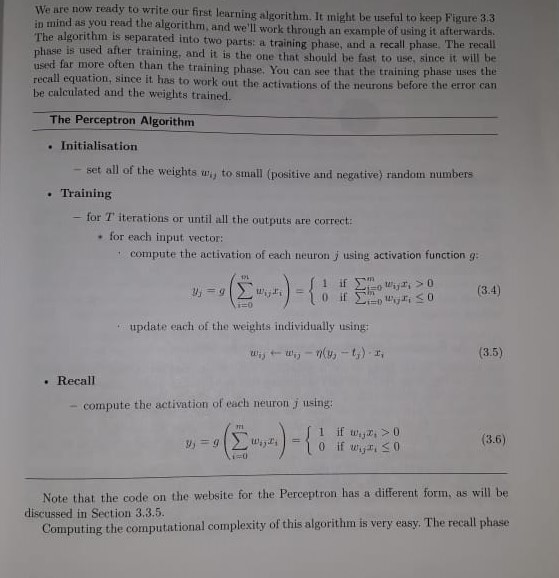

In [1]:
OR_gate_inputs = np.array([[ 0, 0], [ 0, 1], [ 1, 0], [ 1, 1]]) # or use np.concatenate(inputs,-np.ones(4,1),axis=1)
OR_gate_outputs = np.array([[0], [1], [1], [1]])
OR_gate_inputs.shape

(4, 2)

In [2]:
biased_inputs=np.concatenate((OR_gate_inputs,-np.ones((4,1))),axis=1)
biased_inputs

array([[ 0.,  0., -1.],
       [ 0.,  1., -1.],
       [ 1.,  0., -1.],
       [ 1.,  1., -1.]])

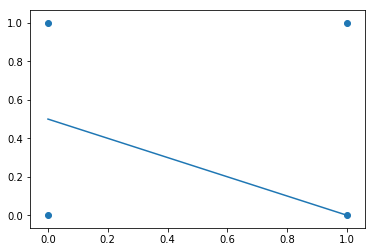

In [12]:
#plot inputs
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(OR_gate_inputs[:,0],OR_gate_inputs[:,1])
plt.plot((0.5,0))
plt.show()

In [ ]:
weights = np.random.rand(3, 1)
np.matmul(OR_gate_inputs, weights)

In [ ]:
def activation(val):
        return 0 if val<0 else 1

class network:
    def __init__(self,inputs,outputs,learning_rate):
        self.weights=np.random.rand(3)
        self.inputs=inputs
        self.learning_rate=learning_rate
        self.outputs=outputs
        self.input_counter=0
        self.stop=0

    def iterate(self):
        while self.stop!=1:
            self.stop=1
            change=0
            for self.input_counter in range(0,4):
                print("\n\n\nCounter: ",self.input_counter)
                print("Weights: ",self.weights)
                prod=np.matmul(self.inputs[self.input_counter], self.weights)
                print("Prod: ",prod)
                self.y=activation(prod)
                print("Y: ",self.y)
                change=self.update_weights()
                if change==1:
                    print("Change not found")
                    self.stop=0
                print("New Weights: ",self.weights)
                print("change: ",change)
                
    
    def update_weights(self):
        delta_weights=self.learning_rate*(self.y-self.outputs[self.input_counter][0])*self.inputs[self.input_counter]
        print("Delta Weights: ",delta_weights)
        if np.sum(delta_weights)!=0:
            self.weights=self.weights-delta_weights
            return 1
        #print("Delta Weights: ",delta_weights)
        return 0

    
    def print_weights(self):
        print("\n\n\nCounter: ",self.input_counter)
        print("Weights: ",self.weights)

        
    def predict(self,x1,x2):
        return activation(np.sum(np.matmul([1,x1,x2],np.transpose(self.weights))))
        
SLP=network(OR_gate_inputs,OR_gate_outputs,0.1)
SLP.iterate()
SLP.predict(0,1)

In [ ]:
SLP.predict(0,0)


In [ ]:
SLP.predict(1,0)


In [ ]:
SLP.predict(1,1)




    matmul differs from dot in two important ways.

        Multiplication by scalars is not allowed.
        Stacks of matrices are broadcast together as if the matrices were elements.

The last point makes it clear that dot and matmul methods behave differently when passed 3D (or higher dimensional) arrays. Quoting from the documentation some more:

For matmul:

    If either argument is N-D, N > 2, it is treated as a stack of matrices residing in the last two indexes and broadcast accordingly.

For np.dot:

    For 2-D arrays it is equivalent to matrix multiplication, and for 1-D arrays to inner product of vectors (without complex conjugation). For N dimensions it is a sum product over the last axis of a and the second-to-last of b


In [ ]:
np.matmul([1,2,3],np.transpose([1]))

In [ ]:
np.dot([[1]],[1,2,3])